In [1]:
from random import random
import matplotlib.pyplot as plt
import math
import numpy as np
from matplotlib.pylab import *

In [2]:
def moon(num_points, distance, radius, width):
    points = num_points

    x1 = [0 for _ in range(points)]
    y1 = [0 for _ in range(points)]
    x2 = [0 for _ in range(points)]
    y2 = [0 for _ in range(points)]

    for i in range(points):
        d = distance
        r = radius
        w = width
        a = random() * math.pi
        x1[i] = math.sqrt(random()) * math.cos(a) * (w / 2) + (
                    (-(r + w / 2) if (random() < 0.5) else (r + w / 2)) * math.cos(a))
        y1[i] = math.sqrt(random()) * math.sin(a) * (w) + (r * math.sin(a)) + d

        a = random() * math.pi + math.pi
        x2[i] = (r + w / 2) + math.sqrt(random()) * math.cos(a) * (w / 2) + (
            (-(r + w / 2)) if (random() < 0.5) else (r + w / 2)) * math.cos(a)
        y2[i] = -(math.sqrt(random()) * math.sin(a) * (-w) + (-r * math.sin(a))) - d
    return ([x1, x2, y1, y2])

In [3]:
def generateData(num_points, distance, radius, width):
    x1, x2, y1, y2 = moon(num_points, distance, radius, width)
 
    x1 = np.array(x1)
    x2 = np.array(x2)
    x = concatenate((x1, x2))
    out1 = np.ones(num_points)

    y1 = np.array(y1)
    y2 = np.array(y2)
    y = concatenate((y1, y2))
    out2 = np.zeros((num_points))

    XX = np.vstack([x, y])
    YY = np.concatenate((out1, out2))

    return XX.T, YY
    

In [4]:
def getLinear(x, w):  
    sum = w[0]
    for k in range(len(x)):
        sum += w[k+1]*x[k]
    return 1.0 if sum >= 0 else 0.0

In [5]:
def train(X, y, learningRate):
    
    epochs_num = 0 
    MSE = [] 
    
    Xn = np.ndarray.copy(X)
    yn = np.ndarray.copy(y)    

    X_mean = np.mean(Xn, axis=0)
    X_std = np.std(Xn, axis=0)
    Xn -= X_mean
    X_std[X_std == 0] = 1
    Xn /= X_std

    y_mean = yn.mean(axis=0)
    yn -= y_mean

    Xn = np.hstack((np.ones(Xn.shape[0])[np.newaxis].T, Xn))
    sq_error = 0
    w = np.zeros(Xn[0].shape)
 
    while True:
        totalError = 0.00
        for x, y in zip(Xn, yn): 
            desired = np.dot(x, w) 
            actual = x[2] 
            if actual != desired:
                errorSignal = y - desired 
                errorMSE = y - getLinear(x[1:], w)
                w = w + learningRate * errorSignal * x
                
                totalError += errorMSE**2        
        epochs_num += 1
        MSE.append(totalError/len(Xn))
           
        if totalError == 0.0 or epochs_num >= 50: # stop condition
            break
            
    return w, MSE
    

In [6]:
def boundary(w, xx):
    x = np.linspace(np.amin(xx),np.amax(xx),50)
    y = -(w[0]+x*w[1])/w[2]
    
    plt.plot(x, y, 'black')

In [7]:
def combine_graph(MSE, distance):
    plt.figure(1)
    plt.plot(range(1, len(MSE)+1), MSE, '--', label=f"d={distance}")
    plt.legend(loc="upper right")
    plt.xlabel("Epochs")
    plt.ylabel("MSE")
    plt.title('Learning curve')
    


In [8]:
def LMS(distance):
    
    x_train, y_train = generateData(1000, distance, 10, 6)
    x_test, y_test = generateData(1000, distance, 10, 6)

    w, MSE = train(x_train, y_train, 0.001)

    figure(1)
    boundary(w, x_train)

    for i in range(len(y_test)):
        if x_test[i][0]*w[1] + x_test[i][1]*w[2] >= -w[0] :
            plt.scatter(x_test[i][0], x_test[i][1], marker='x', color='r')
        else:
            plt.scatter(x_test[i][0], x_test[i][1], marker='x', color='b')

    plt.axis([-20, 30, -20, 20])
    plt.title('Classification using LMS')

    plt.show()


### Task 2.A - d = 0
Computer experiment on pattern classification for the distance of separation between the two moons with d = 0 using the least-mean-square algorithm

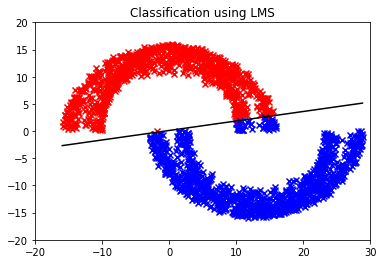

In [9]:
LMS(0)

### Task 2.B - d = 1
Computer experiment on pattern classification for the distance of separation between the two moons with d = 1 using the least-mean-square algorithm

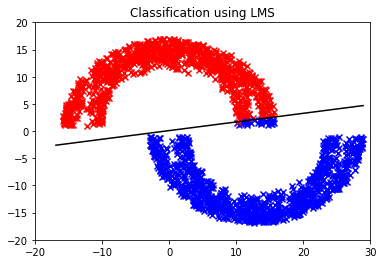

In [10]:
LMS(1)

### Task 2.A - d = -4
Computer experiment on pattern classification for the distance of separation between the two moons with d = -4 using the least-mean-square algorithm

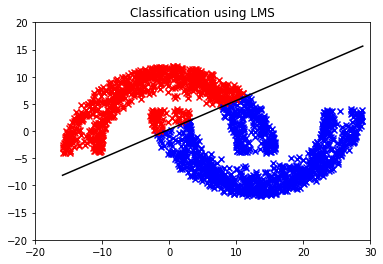

In [11]:
LMS(-4)

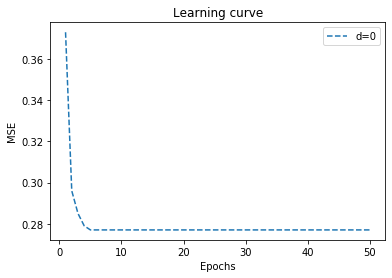

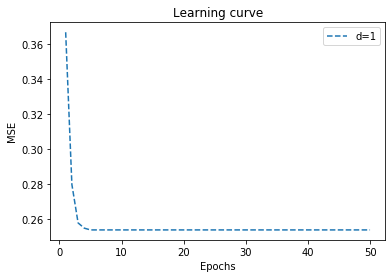

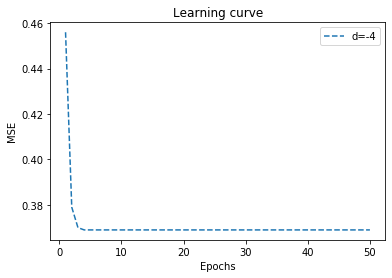

In [12]:
d = [0, 1, -4]
for distance in d:
    x_train, y_train = generateData(1000, distance, 10, 6)
    x_test, y_test = generateData(1000, distance, 10, 6)

    w, MSE = train(x_train, y_train, 0.001)
    
    iteration = [i for i in range(50)]

    combine_graph(MSE, distance)
    
    plt.show()